<a href="https://colab.research.google.com/github/ThamirisNeves/Mestrado_EEG/blob/main/ICA_EEG_teste_covariancia_com_separacao(classe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo de teste apenas de dados de EEG para mistura não linear


#Coleta de dados de EEG para teste com o modelo testado para dados simulados
--> Braindecode

In [ ]:
#ver o eixo que estou aplicando (talvez esteja aplicando em cada canal) -- verificar essa etapa
## comentar no código o que é cada dimensão

In [ ]:
#ver o artigo do dataset --> se existe uma mudança drastica no tempo que o individuo fez o teste da obtenção dos dados do ica
# usar apenas uma janela de cada usuario
#olhar o codigo do gustavo --> separar entre classes

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install moabb braindecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.7.1, 1.7.1+cpu, 1.7.1+cu101, 1.7.1+cu110, 1.7.1+cu92, 1.7.1+rocm3.7, 1.7.1+rocm3.8, 1.8.0, 1.8.0+cpu, 1.8.0+cu101, 1.8.0+cu111, 1.8.0+rocm3.10, 1.8.0+rocm4.0.1, 1.8.1, 1.8.1+cpu, 1.8.1+cu101, 1.8.1+cu102, 1.8.1+cu111, 1.8.1+rocm3.10, 1.8.1+rocm4.0.1, 1.9.0, 1.9.0+cpu, 1.9.0+cu102, 1.9.0+cu111, 1.9.0+rocm4.0.1, 1.9.0+rocm4.1, 1.9.0+rocm4.2, 1.9.1, 1.9.1+cpu, 1.9.1+cu102, 1.9.1+cu111, 1.9.1+rocm4.0.1, 1.9.1+rocm4.1, 1.9.1+rocm4.2, 1.10.0, 1.10.0+cpu, 1.10.0+cu102, 1.10.0+cu111, 1.10.0+cu113, 1.10.0+rocm4.0.1, 1.10.0+rocm4.1, 1.10.0+rocm4.2, 1.10.1, 1.10.1+cpu, 1.10.1+cu102, 1.10.1+cu111, 1.10.1+cu113, 1.10.1+rocm4.0.1, 1.10.1+rocm4.1, 1.10.1+rocm4.2, 1.10.2, 1.10.2+cpu, 1.10.2+cu102, 1.10.2+cu111, 1.10.2+cu113, 1.10.2+rocm4.0

Apenas 1 sujeito: Sujeito que estou pegando aqui é o sujeito 3

In [ ]:
from braindecode import datasets
from braindecode.datasets import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])

print(dataset.description)

/usr/local/lib/python3.9/dist-packages/moabb/datasets/download.py:53: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))


MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 4.01GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 42.3M/42.3M [00:00<00:00, 4.31GB/s]
SHA256 hash of downloaded file: d4229267ec7624fa8bd3af5cbebac17f415f7c722de6cb676748f8cb3b717d97
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
    subject    session    run
0         3  session_T  run_0
1         3  session_T  run_1
2         3  session_T  run_2
3         3  session_T  run_3
4         3  session_T  run_4
5         3  session_T  run_5
6         3  session_E  run_0
7         3  session_E  run_1
8         3  session_E  run_2
9         3  session_E  run_3
10        3  session_E  run_4
11        3  session_E  run_5


Aqui é um print de apenas 1 dataset dentro de 12 datasets (12 rodadas - 6 rodadas de treino e 6 rodadas de teste)

In [ ]:
dataset.datasets[0].raw.to_data_frame()

,time,Fz,FC3,FC1,FCz,FC2,FC4,C5,C3,C1,...,CP2,CP4,P1,Pz,P2,POz,EOG1,EOG2,EOG3,stim
0,0.000,6.494141,-0.146484,4.736328,3.857422,2.148437,-2.587891,-1.660156,-1.464844,0.488281,...,-6.884766,-7.910156,-14.062500,-9.423828,-13.525391,-18.066406,-3.417969,8.300781,5.859375,0.0
1,0.004,3.906250,-2.832031,1.269531,0.341797,-1.855469,-6.396484,-5.810547,-5.419922,-1.171875,...,-11.718750,-13.378906,-16.699219,-13.281250,-19.335937,-23.095703,2.441406,10.253906,0.976562,0.0
2,0.008,9.912109,6.738281,7.226562,7.666016,3.955078,2.490234,0.976562,3.515625,5.371094,...,-4.003906,-4.394531,-8.837891,-4.980469,-10.742188,-13.867187,9.277344,13.671875,6.347656,0.0
3,0.012,7.421875,4.003906,4.638672,6.591797,1.025391,3.564453,2.685547,6.005859,4.541016,...,-4.931641,-6.152344,-8.251953,-7.226562,-13.623047,-17.675781,10.742188,13.183594,5.859375,0.0
4,0.016,-5.712891,-4.687500,-5.566406,-4.638672,-9.472656,-8.105469,-5.810547,-2.343750,-3.369141,...,-13.525391,-15.380859,-14.013672,-14.013672,-21.191406,-23.339844,-5.371094,0.000000,-6.347656,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96730,386.920,-18.261719,-8.789062,-11.669922,-13.525391,-17.480469,-20.947266,-7.177734,-6.933594,-9.375000,...,-23.876953,-28.955078,-11.425781,-18.798828,-20.068359,-14.160156,-1.953125,-46.386719,-12.207031,0.0
96731,386.924,-8.056641,4.589844,1.562500,-3.759766,-5.419922,-10.986328,5.126953,4.003906,2.099609,...,-14.501953,-19.970703,-2.880859,-10.009766,-11.083984,-4.882812,0.976562,-45.898438,-12.207031,0.0
96732,386.928,-14.160156,5.419922,-3.173828,-4.394531,-10.156250,-12.353516,-0.292969,3.271484,-3.417969,...,-16.748047,-22.851562,-5.957031,-12.207031,-13.232422,-7.373047,-1.464844,-50.781250,-10.742188,0.0
96733,386.932,-24.707031,-12.402344,-15.869141,-19.970703,-22.265625,-30.810547,-13.037109,-14.355469,-15.673828,...,-27.832031,-33.056641,-16.503906,-23.193359,-23.095703,-15.771484,-10.253906,-56.152344,-20.507812,0.0


Pré processamento básico - código retirado do briandecode

In [ ]:
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor, scale)

low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                 factor_new=factor_new, init_block_size=init_block_size)
]

# Transform the data
preprocess(dataset, preprocessors)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Criando janela de eventos: dividindo as bases entre treino e teste em épocas

Cada época representa uma classe diferente

Além disso, retiramos o ínicio e o final dos dados (resíduo)

In [ ]:
from braindecode.preprocessing import create_windows_from_events

offset = -0.5

sfreq = dataset.datasets[0].raw.info['sfreq']
assert all([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets])
# Calcula quando começa de fato a execução do movimento.
trial_start_offset_samples = int(offset * sfreq)
windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=trial_start_offset_samples,
    trial_stop_offset_samples=0,
    preload=True,
)
#Divide os dados em treino e teste
splitted = windows_dataset.split('session')
train_set = splitted['session_T']
valid_set = splitted['session_E']


Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


Aqui é um print de apenas 1 dataset de treino contendo 48 épocas e 54000 amostras

In [ ]:
train_set.datasets[0].windows.to_data_frame()

,time,condition,epoch,Fz,FC3,FC1,FCz,FC2,FC4,C5,...,C6,CP3,CP1,CPz,CP2,CP4,P1,Pz,P2,POz
0,0.000,left_hand,0,-2.172395e+05,-3.356897e+05,-1.547392e+05,-3.112529e+05,-3.869214e+05,-5.252199e+05,1.608167e+05,...,-967733.160677,5.587671e+04,1.446084e+05,9.964704e+03,-3.436497e+04,-2.761891e+05,-7.395379e+04,1.600318e+05,4.352465e+04,1.251943e+05
1,0.004,left_hand,0,-1.529343e+05,-6.590405e+05,-3.300484e+05,-3.148636e+05,-2.367157e+05,-4.124697e+05,-4.897971e+05,...,-698397.082870,-3.438858e+05,-5.726611e+04,8.011425e+03,1.317336e+04,-2.713270e+05,-1.314617e+05,1.612326e+05,5.706226e+04,1.600256e+05
2,0.008,left_hand,0,2.026980e+05,-5.462836e+05,-1.454605e+05,1.922104e+04,2.609232e+05,7.129143e+04,-6.622778e+05,...,-250207.622783,-2.414329e+05,1.749898e+05,3.633730e+05,3.575497e+05,3.304852e+03,2.613704e+05,4.920847e+05,3.557394e+05,5.113740e+05
3,0.012,left_hand,0,6.921749e+05,-1.040104e+05,2.780394e+05,5.349607e+05,8.742239e+05,7.048575e+05,-4.638181e+05,...,171284.379850,1.666211e+05,6.070518e+05,8.411805e+05,7.857446e+05,3.487864e+05,8.148939e+05,9.214595e+05,7.259793e+05,9.566913e+05
4,0.016,left_hand,0,1.100599e+06,3.882684e+05,6.894982e+05,9.921974e+05,1.321112e+06,1.227607e+06,-2.271576e+05,...,469153.821134,5.102128e+05,8.977367e+05,1.157342e+06,1.060378e+06,5.772407e+05,1.162385e+06,1.183110e+06,9.434586e+05,1.221209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4.480,tongue,47,9.079834e+05,1.338487e+05,1.011638e+04,4.074944e+05,3.961406e+05,5.693596e+05,-1.922234e+06,...,307293.890269,-1.928237e+06,-1.377320e+06,-7.454512e+05,-6.672987e+05,-4.691225e+05,-1.202646e+06,-1.028297e+06,-7.497613e+05,-8.340843e+05
53996,4.484,tongue,47,-9.776642e+04,-1.105714e+06,-1.210768e+06,-7.690979e+05,-7.403438e+05,-4.450069e+05,-2.957881e+06,...,-366937.347695,-3.037941e+06,-2.540576e+06,-1.934270e+06,-1.756737e+06,-1.408837e+06,-2.167347e+06,-2.007117e+06,-1.697638e+06,-1.670022e+06
53997,4.488,tongue,47,-9.766005e+05,-2.316571e+06,-2.270032e+06,-1.826936e+06,-1.716285e+06,-1.362421e+06,-3.356828e+06,...,-894082.515216,-3.688483e+06,-3.292166e+06,-2.869893e+06,-2.577402e+06,-2.130859e+06,-2.785642e+06,-2.675230e+06,-2.364158e+06,-2.214121e+06
53998,4.492,tongue,47,-1.305530e+06,-2.833930e+06,-2.634024e+06,-2.249514e+06,-2.064967e+06,-1.722048e+06,-2.866041e+06,...,-946064.642668,-3.445843e+06,-3.202660e+06,-3.043897e+06,-2.672159e+06,-2.210349e+06,-2.625823e+06,-2.616217e+06,-2.348009e+06,-2.076728e+06


In [ ]:
#Lista com os datasets de treino e teste de apenas um sujeito
#Totalizando uma lista de 12 (rodadas) posições de tamanho 96735x23 (96735 dados no tempo, 22 canais + 1 coluna que representa o tempo)
dataset_list = []

for data in train_set.datasets:
  #df_dataset = data.raw.to_data_frame() #copiando cada dataset (dos 12) no formato dataframe para uma variável
  df_dataset = data.windows.to_data_frame()
  #df_dataset = df_dataset.join(data.description)
  dataset_list.append(df_dataset.copy())
#dataset_list_train[1]

In [ ]:
type(dataset_list[0])

pandas.core.frame.DataFrame

O dataset_list é uma lista de datasets e contém 6 datasets (de treino), 54000 amostras no tempo e 25 são features onde 22 são canais, o restante são tempo, classe e época.

In [ ]:
# O dataset_list é uma lista de datasets e contém 6 datasets (de treino)
# 54000 amostras no tempo
# 25 features onde 22 são canais
import numpy as np
np.shape(dataset_list)

(6, 54000, 25)

In [ ]:
dataset_list[0]

,time,condition,epoch,Fz,FC3,FC1,FCz,FC2,FC4,C5,...,C6,CP3,CP1,CPz,CP2,CP4,P1,Pz,P2,POz
0,0.000,left_hand,0,-2.172395e+05,-3.356897e+05,-1.547392e+05,-3.112529e+05,-3.869214e+05,-5.252199e+05,1.608167e+05,...,-967733.160677,5.587671e+04,1.446084e+05,9.964704e+03,-3.436497e+04,-2.761891e+05,-7.395379e+04,1.600318e+05,4.352465e+04,1.251943e+05
1,0.004,left_hand,0,-1.529343e+05,-6.590405e+05,-3.300484e+05,-3.148636e+05,-2.367157e+05,-4.124697e+05,-4.897971e+05,...,-698397.082870,-3.438858e+05,-5.726611e+04,8.011425e+03,1.317336e+04,-2.713270e+05,-1.314617e+05,1.612326e+05,5.706226e+04,1.600256e+05
2,0.008,left_hand,0,2.026980e+05,-5.462836e+05,-1.454605e+05,1.922104e+04,2.609232e+05,7.129143e+04,-6.622778e+05,...,-250207.622783,-2.414329e+05,1.749898e+05,3.633730e+05,3.575497e+05,3.304852e+03,2.613704e+05,4.920847e+05,3.557394e+05,5.113740e+05
3,0.012,left_hand,0,6.921749e+05,-1.040104e+05,2.780394e+05,5.349607e+05,8.742239e+05,7.048575e+05,-4.638181e+05,...,171284.379850,1.666211e+05,6.070518e+05,8.411805e+05,7.857446e+05,3.487864e+05,8.148939e+05,9.214595e+05,7.259793e+05,9.566913e+05
4,0.016,left_hand,0,1.100599e+06,3.882684e+05,6.894982e+05,9.921974e+05,1.321112e+06,1.227607e+06,-2.271576e+05,...,469153.821134,5.102128e+05,8.977367e+05,1.157342e+06,1.060378e+06,5.772407e+05,1.162385e+06,1.183110e+06,9.434586e+05,1.221209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4.480,tongue,47,9.079834e+05,1.338487e+05,1.011638e+04,4.074944e+05,3.961406e+05,5.693596e+05,-1.922234e+06,...,307293.890269,-1.928237e+06,-1.377320e+06,-7.454512e+05,-6.672987e+05,-4.691225e+05,-1.202646e+06,-1.028297e+06,-7.497613e+05,-8.340843e+05
53996,4.484,tongue,47,-9.776642e+04,-1.105714e+06,-1.210768e+06,-7.690979e+05,-7.403438e+05,-4.450069e+05,-2.957881e+06,...,-366937.347695,-3.037941e+06,-2.540576e+06,-1.934270e+06,-1.756737e+06,-1.408837e+06,-2.167347e+06,-2.007117e+06,-1.697638e+06,-1.670022e+06
53997,4.488,tongue,47,-9.766005e+05,-2.316571e+06,-2.270032e+06,-1.826936e+06,-1.716285e+06,-1.362421e+06,-3.356828e+06,...,-894082.515216,-3.688483e+06,-3.292166e+06,-2.869893e+06,-2.577402e+06,-2.130859e+06,-2.785642e+06,-2.675230e+06,-2.364158e+06,-2.214121e+06
53998,4.492,tongue,47,-1.305530e+06,-2.833930e+06,-2.634024e+06,-2.249514e+06,-2.064967e+06,-1.722048e+06,-2.866041e+06,...,-946064.642668,-3.445843e+06,-3.202660e+06,-3.043897e+06,-2.672159e+06,-2.210349e+06,-2.625823e+06,-2.616217e+06,-2.348009e+06,-2.076728e+06


Agrupando os dados pela classe e por cada época

In [ ]:
import pandas as pd

sensores = dataset.datasets[0].raw.ch_names

df_todos_train = []
df_transf = pd.DataFrame()

# Number of sample points
N = 1125

for data in dataset_list:
  #print(data)
  #break
  for (mov,ep),df_mov in data.groupby(by=['condition','epoch']):
    df_transf=pd.DataFrame([i for i in range(N)],columns=['indice'])
    #print(df_mov)
    #break
    for sensor in sensores:
      df_transf['condition'] = mov
      df_transf['epoch'] = ep
      #print(df_mov[sensor])
      df_transf[sensor]= df_mov[sensor].to_numpy()
      #print(df_transf[sensor])
      #break
        #print(df_transf)
    #break
    df_todos_train.append(df_transf) #uma lista com os valores das transformadas de fourier de cada sensor normalizado para cada movimento e cada época
np.shape(df_todos_train)


(288, 1125, 25)

In [ ]:
df_todos_train[0]

,indice,condition,epoch,Fz,FC3,FC1,FCz,FC2,FC4,C5,...,C6,CP3,CP1,CPz,CP2,CP4,P1,Pz,P2,POz
0,0,feet,7,-9.936546e+05,-1.157411e+06,-1.408992e+06,-1.268319e+06,-1.051894e+06,-5.324841e+05,-343234.624372,...,2.497962e+04,-2.804173e+05,-542389.379774,-2.344419e+05,-4.180879e+05,-2.122800e+05,-2.282895e+05,-3.556405e+05,-3.449964e+05,-3.819301e+05
1,1,feet,7,-1.484678e+06,-1.405366e+06,-1.557160e+06,-1.627997e+06,-1.459349e+06,-1.046486e+06,-648830.975498,...,-5.241932e+05,-2.718830e+05,-546839.205542,-4.089650e+05,-7.118646e+05,-6.107669e+05,-4.136246e+05,-6.180161e+05,-6.561228e+05,-7.024203e+05
2,2,feet,7,-2.002787e+06,-1.608402e+06,-1.764345e+06,-1.945402e+06,-1.911760e+06,-1.604149e+06,-909553.917446,...,-1.051838e+06,-2.973447e+05,-646577.522615,-6.339530e+05,-1.010220e+06,-9.956580e+05,-5.855635e+05,-8.623286e+05,-9.155546e+05,-9.478212e+05
3,3,feet,7,-2.192297e+06,-1.482706e+06,-1.751839e+06,-1.931094e+06,-2.047000e+06,-1.803803e+06,-806609.027885,...,-1.149223e+06,-1.577873e+05,-635698.051986,-6.960493e+05,-1.046305e+06,-1.051639e+06,-5.398978e+05,-8.667823e+05,-8.792491e+05,-8.558334e+05
4,4,feet,7,-1.876770e+06,-9.302544e+05,-1.366510e+06,-1.509054e+06,-1.689254e+06,-1.468454e+06,-247691.557451,...,-6.868414e+05,1.909269e+05,-398865.415834,-4.983480e+05,-7.117889e+05,-6.509035e+05,-2.172314e+05,-5.555598e+05,-4.689161e+05,-3.653827e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1120,feet,7,1.745601e+04,-6.362539e+05,-3.992220e+05,1.661372e+05,5.576469e+05,6.625819e+05,-396275.190464,...,3.329923e+05,2.893740e+05,927478.730533,1.394133e+06,1.354493e+06,1.055914e+06,1.165329e+06,1.623951e+06,1.361125e+06,1.112723e+06
1121,1121,feet,7,1.233732e+05,-8.006969e+05,-4.180308e+05,4.596019e+04,4.354423e+05,5.737273e+05,-286535.500249,...,1.469544e+05,1.066558e+05,751120.113437,1.150195e+06,1.144157e+06,9.632959e+05,8.098055e+05,1.308320e+06,1.060999e+06,6.798626e+05
1122,1122,feet,7,1.076110e+05,-9.187229e+05,-4.429474e+05,-1.682829e+05,1.810889e+05,3.014810e+05,-199794.344992,...,1.501532e+05,-1.270930e+05,473455.556810,7.476808e+05,7.777288e+05,7.627269e+05,3.165148e+05,8.082921e+05,6.172814e+05,1.108172e+05
1123,1123,feet,7,-1.973300e+05,-1.001158e+06,-6.239118e+05,-5.225556e+05,-3.090238e+05,-1.986089e+05,-338179.121184,...,1.081605e+05,-4.995566e+05,-60912.983287,1.061518e+05,1.350662e+05,2.712646e+05,-3.998109e+05,4.329457e+04,-6.605279e+04,-6.478300e+05


In [ ]:
#Aqui estou separando cada classe das bases de treino em 1 variável
#Estão separadas por classe

left_hand = []
right_hand = []
feet = []
tongue = []
for i in df_todos_train:
  if i['condition'].unique() == 'left_hand':
    #for sensor in sensores:
    left_hand.append(i[sensores].to_numpy().T)
  elif i['condition'].unique() == 'right_hand':
    right_hand.append(i[sensores].to_numpy().T)
  elif i['condition'].unique() == 'feet':
    feet.append(i[sensores].to_numpy().T)
  else:
    tongue.append(i[sensores].to_numpy().T)
print(np.shape(left_hand))
print(np.shape(right_hand))
print(np.shape(feet))
print(np.shape(tongue))

(72, 22, 1125)
(72, 22, 1125)
(72, 22, 1125)
(72, 22, 1125)


# Normalizando os dados  

In [ ]:
#Importando Bibliotecas a serem utilizadas no projeto
import pandas as pd

#Biblioteca para plotar dados(Mais bonito)
import seaborn as sns

#converter os campos de horas
from datetime import datetime
import math
import time
from datetime import datetime

#pacote estatístico retorna desvio padrão sem viés pra variância
import statistics as st

from scipy.fft import fft, fftfreq, fftshift

import sklearn.decomposition as skd
from sklearn.preprocessing import normalize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
sensores = dataset.datasets[0].raw.ch_names

dataset_list_normalized=[]

for database in df_todos_train:
  aux = []
  for sensor in sensores:
    #verificar eixo de normalização
    #df_dataset = pd.DataFrame(normalize(database[sensores]),columns = sensores).to_numpy()
    df_dataset = database[sensor].to_numpy()
    aux.append(df_dataset)
    #print(sensores)
    #break
    #print(df_dataset.shape)
    #df_dataset = df_dataset+2
    #df_dataset = df_dataset.to_numpy()
  dataset_list_normalized.append(aux)  # e colocando cada dataframe em uma posição da lista dataset_list_train
dataset_list_normalized = np.array(dataset_list_normalized)

Dataset_list_normalized é uma lista de arrays contendo 6 'datasets' (de treino), 22 canais e 54000 amostras no tempo.

In [ ]:
#Dataset_list_normalized é uma lista de arrays contendo 6 'datasets' (de treino)
#22 canais e 54000 amostras no tempo
np.shape(dataset_list_normalized)

(288, 22, 1125)

In [ ]:
## verificando se existe algum valor nan ou zero no dataset
import math

cont = 0
for k in dataset_list_normalized:
  for j in k:
    for i in j:
      x = math.isnan(i)
      if x == 'True':
        print('ok')
      if i == 0:
        #print(i)
        cont = cont + 1
print(cont)

0


Aqui é a função que normaliza de uma vez todas as amostras

**Precisa olhar aqui !!!**

In [ ]:
from sklearn.preprocessing import StandardScaler

def normaliza_StandardScaler(x):
  aux1 = []
  for dados in x:
    #colocar um for - 1 canal e 1 potencia
    aux = []
    #if np.shape(x)[1]>np.shape(x)[2]:
      #dados = dados.T
    for c in dados:
      #print(c.shape)
      #x1 = np.array(c).astype(np.float64).T
      x1 = np.array(c).astype(np.float64).reshape(1, -1).T
      #print(x1)
      p = StandardScaler()
      p.fit(x1)
      x1 = np.matrix(p.transform(x1)).T
      #print(x1)
      #print(x1.shape)
      aux.append(x1)
    aux1.append(aux)

  res = np.array(aux1)[:,:,0,:]#.reshape(np.shape(x))[:,:,0,:]
  #print(type(res[0][0][0]))
  #print(res.shape)
  return(res)

In [ ]:
normalized = normaliza_StandardScaler(dataset_list_normalized)

In [ ]:
left_hand = normaliza_StandardScaler(left_hand)
right_hand = normaliza_StandardScaler(right_hand)
feet = normaliza_StandardScaler(feet)
tongue = normaliza_StandardScaler(tongue)

In [ ]:
np.shape(left_hand)

(72, 22, 1125)

In [ ]:
#with open('left_hand.npy','wb') as f:
#  np.save(f,np.array(left_hand))

normalized é uma lista de arrays contendo 6 'datasets' (de treino), 22 canais e 54000 amostras no tempo
é a variavel 'dataset_list_normalized' normalizada pela função 'normaliza_StandardScaler'

In [ ]:
#normalized é uma lista de arrays contendo 6 'datasets' (de treino),
#22 canais e 54000 amostras no tempo
#é a variavel 'dataset_list_normalized' normalizada pela função 'normaliza_StandardScaler'
np.shape(normalized)

(288, 22, 1125)

#AMUSE


In [ ]:
def off(X):
    off_ = 0
    for x in X:
        off_ += (np.linalg.norm(x,ord='fro')**2 - np.linalg.norm(np.diag(x))**2)
        #off_ += (np.linalg.norm(x)**2 - np.linalg.norm(np.diag(x))**2)

    return off_/np.max(X)

In [ ]:
def AMUSE(X, tau):
  #----------------Whitening data----------------------------------#
  loss_vec = []
  X_T = X.T
  XC = X_T - np.mean(X_T, axis=0)

  XC = XC.T
  #XC = X_T.T

  # Calculate Covariance matrix
  # Note: 'rowvar=True' because each row is considered as a feature
  # Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
  xcov = np.cov(XC, rowvar=True, bias=True)
  xcov = (xcov + xcov.T)/2

  # Calculate Eigenvalues and Eigenvectors
  w, e = linalg.eig(xcov) # .eigh()
  #print('w=',w)
  #print('e=',e)

  # Calculate inverse square root of Eigenvalues
  # Optional: Add '.1e5' to avoid division errors if needed
  # Create a diagonal matrix
  diagw = np.diag(w) # or np.diag(1/((w+.1e-5)**0.5))
  diagw = diagw.real #convert to real and round off

  #Calculate whitening
  #print('conta =',np.diag(1/(w.real**0.5)))
  V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))

  Xwhite = np.dot(V,XC)

  #--------------------------------------------------------------#

  #TIME LAG -----------------------------------------------------#
  #matriz branqueada com valores sem lag ajustadas para o mesmo tamanho da matriz com lag
  X_nolag = Xwhite[:,tau:]
  #matriz branqueada com valores com lag ajustadas para o mesmo tamanho da matriz com lag

  X_lag = Xwhite[:,:-tau] if tau != 0 else Xwhite[:,:]

  #Matriz de Covariância da
  C_z_tau = (1/2)*(1/(Xwhite.shape[1] - tau))*(np.dot(X_nolag,X_lag.T) + (np.dot(X_lag,X_nolag.T)))
  #loss = (np.sum(np.abs(C_z_tau))-np.trace(np.abs(C_z_tau)))
  #loss_vec.append(loss)
  #print('\nloss_ICA =', loss, '\n')


  #Autovalores e autovetores da matriz de coveriância usando time lag
  #print('Cz',C_z_tau)
  w1, e1 = linalg.eig(C_z_tau) # .eigh()
  #print('w1=',w1)
  #print('e1=',e1)

  #As linhas da matriz de separação W são dadas pelos autovetores
  W = e1.T

  #X_RES é o X resultante da multiplicação do x branqueado e a matriz de separação
  X_RES = np.dot(W,Xwhite)

  cov_X = np.matrix(np.cov(X_RES, rowvar=True, bias=True))
  loss = (np.sum(np.abs(cov_X))-np.trace(np.abs(cov_X)))
  loss_vec.append(loss)
  print('\nloss_ICA =', loss, '\n')
  print('loss_ICA_sobi = ', off(cov_X), '\n')

  J = np.matmul(W,V) #????

  return  W, X_RES, Xwhite, J, C_z_tau, loss_vec

# Funções de manipulação dos dados de entrada

In [ ]:
#Função que retorna a quantidade de potencias definida por b
#(retorna apenas as potencias ímpares)
#x são os dados (sinais)
#canais é a quatidade de canais que serão passados
#b é a quantidade de potencias
#a quatidade no final será b*canais, ou um tensor com b posições para cada canal
from scipy.special import factorial

def potencias(x, b):
  X_final = []
  canais = np.shape(x)[0]
  #print(canais)
  for data in x:
    cont=1
    aux = 0
    X_list = []
    while (cont%(b+1))!=0:
      #print(aux)
      #X = (1/factorial(cont+aux))*np.power(data,cont+aux)
      X = np.power(data,cont+aux)
      #print(X)
      #print(cont+aux)
      aux = (cont%(b+1))
      cont = cont+1
      X_list.append(X)
      #print(np.shape(X_list))
    X_list = np.reshape(X_list, (b,np.shape(data)[0]))
    X_final.append(X_list)
  X_final = np.reshape(X_final, (canais,b,np.shape(data)[0]))

  #print(X_final)
  #print(np.shape(X_final))
  return np.array(X_final)

In [ ]:
test_eeg = potencias(dataset_list_normalized[0].T,4)

In [ ]:
#Função que retorna o número de constantes(no começo as constantes dão definidas por 1)
#em uma matriz coluna, correspondente a quantidade de pontecias definida pelo usuario
#e tbm corresponde ao numero de canais inicializados.
#Cada constante multiplica 1 linha de um canal, ou seja,
#c1*g11, c2*g12, c3*g21, c4*22
#retorna um tensor (canais,b,c=1) (compativel com o retorno da função potencias)

def constantes_iniciais(x, b, c):
  const = []
  canais = np.shape(x)[0]
  #print(canais)
  for canal in range(0,canais):
    aux = np.matrix(b*[c]).T
    const.append(aux)
  #print(const)
  return const

In [ ]:
#Função que retorna a multiplicação das constantes pelas potencias geradas
def g_x(potencias, c):
  return np.multiply(c,potencias)

In [ ]:
def soma_potencias(x,c):
  z = g_x(x,c)
  s = []
  for pot in z:
    soma = 0
    for data in pot:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)


In [ ]:
normalized[0].shape

(22, 1125)

# Atribuição dos valores com manipulação

Aqui é o teste com os sinais de EEG: gerando 4 potencias para apenas 1 dataset de treino (22,54000) ---> (22, 4, 54000)


22 canais, 4 potencias, 54000 amostras

In [ ]:
# Função não linear


#definindo os valores da expansão em série de taylor: b = 4
#(pegamos somente potencias impar)
#valores sem atraso
#dados gaussianos gerados aleatoriamente (x,b,c), onde c é o valor da constante
#que será multiplicada por cada valor de potencia
from sklearn.preprocessing import MaxAbsScaler

#standard scale ao inves de maxabsscaler

####### t-SNE -> consegue fazer uma representação das matrizes de covariancia do ICA?
# t-SNE é mais usada para visualização

b = 4
aux = normalized
#aux = retira_valores(dataset_list_normalized)

#x1 = dataset_list_normalized[0].T
#x1 = aux[0]
x1 = aux[0]
#print(x1.shape)
#print(type(x1))

c1 = constantes_iniciais(x1,b,1)
# COMO A PRINCIPIO AS CONSTANTES SAO IGUAIS A 1, GX = CSI NESSE MOMENTO
gx1 = potencias(x1,b)
gx1_2 = normaliza_StandardScaler(gx1)
#print(type(gx1_2))
z1 = soma_potencias(gx1_2,c1)
print(gx1_2.shape)
#print(z1)
print(z1.shape)
#print(type(z1))

#dados de 1 usuario de 1 base de dados de treino de eeg
c2 = constantes_iniciais(normalized[0],b,1)
gx2 = potencias(normalized[0],b)
z2 = soma_potencias(gx2,c2)
print(gx2.shape)
print(z2.shape)


CC1 = np.zeros(np.shape(z1))
CC2 = np.zeros(np.shape(z2))

(22, 4, 1125)
(22, 1125)
(22, 4, 1125)
(22, 1125)


In [ ]:
## verificando se existe algum valor nan ou zero no dataset
import math

cont = 0
for k in gx1_2:
  for j in k:
    for i in j:
      x = math.isnan(i)
      if x == 'True':
        print('ok')
      if i == 0:
        #print(i)
        cont = cont + 1
print(cont)

0


#Funções auxiliares da função mistura não linear

In [ ]:
def cov_lag(x,tau):
  X_lag = x[:,:-tau] if tau != 0 else x[:,:]
  X_nolag = x[:,tau:]
  #calcula matriz de covariancia de atrasos
  cov = (1/(X_lag.shape[1]))*(np.dot(X_nolag,X_lag.T))
  #cov = np.cov(X_lag, rowvar=True, bias=True)

  return cov

In [ ]:
def normaliza_w(w_matriz, ry):
  aux = []
  aux2 = []
  for i in range(0,np.shape(ry)[0]):
    ey = ry[i,i]
    #print(ey)
    w = np.divide(w_matriz[i,:],ey)
    #print(w.shape)
    aux.append(w)
    #print(aux)
  #print(np.shape(aux))
  W = np.array(aux)
  #print('tamanho',W.shape)
  return W


In [ ]:
# Função que retorna a atualização um vetor com a constantes atualizadas
# para multiplicação pela função gx, e em seguida obter z

def atualiza_constante(c,n_canal):
  aux = []
  k = 0
  s = []
  x = []
  X = []
  for linha in c:
    #Seguindo a restricao imposta para as constantes de g(x)
    # A primeira potencia x^1 não pode ser anulada, portanto, suas constantes
    #são fixas em 1
    soma = 0
    linha[0] = 1
    aux.append(linha)
    for valor in linha:
      #print(valor)
      soma = soma + np.abs(valor)
      #print(soma)
    s.append(soma)
  S = np.array(s)
  #print(S)
  C = np.array(aux)

  for i in range(0,n_canal):
    x.append(np.divide(C[i],S[i]))
  #print(x)


  #Transformando matrix canal x pot em vetor canal*pot
  for linha in x:
    linha[0] = 1
    for valor in linha:
      X.append(valor)
  X = np.array(X)
  return(X)


In [ ]:
# Função que retorna a multiplicação de gx por c
def multiplica_constante(c, gx):
  i = 0
  X_aux = []
  X = []
  tam = np.shape(gx)
  for j in gx:
    #print(j.shape)
    for k in j:
      aux = c[i]*k
      i = i +1
      X_aux.append(aux)
  X.append(X_aux)
  X = np.array(X)
  X = np.reshape(X,tam)
  return(X)


In [ ]:
#Função que retorna a soma das gx's para encontra z(x), voltando ao tamanho
# original que seria canais x amostras

def soma_teste(x):
  #z = g_x(x,c)
  s = []
  for i in x:
    soma = 0
    for data in i:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)

# Função de mistura não linear

In [ ]:
def off(X):
    off_ = 0
    for x in X:
        off_ += (np.linalg.norm(x,ord='fro')**2 - np.linalg.norm(np.diag(x))**2)
        #off_ += (np.linalg.norm(x)**2 - np.linalg.norm(np.diag(x))**2)

    return off_/np.max(X)

In [ ]:
###### FUNCAO MISTURA_NAO_LINEAR TESTE USANDO CSI AO INVES DE Z(X) #######
# TENTATIVA DE AJUSTAR OS COEFICIENTES QUE MULTIPLICAM CSI PARA ENCONTRAR G(X)
# MATRIZ DE COEFICIENTES (CONSTANTE) DEVE TER TAMANHO CANAIS X B (Nº DE POTENCIAS - POT)

from random import random
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm

# Função não linear
# f=x^3, observacao do sinal x

def mistura_nao_linear(z, gx, pot):
  #Nao Linear
  #z é do tamanho canais x amostras
  mu = 0.01 # aumentar ou diminuir *** - 0.1, 0.5, 0.01
  tau = 4
  C_aux = []
  for i in range(0,np.shape(z)[0]):
    c = np.array(pot*[1])
    C_aux.append(c)
  C = np.array(C_aux)
  #print(C.shape)
  n_samples = np.shape(z)[1]

  for b in tqdm(range(4,n_samples)):

    ############### PARTE LINEAR ####################

    #Calculo das matrizes de covariancia com atrasos
    #tau = 1
    W_matriz_1, y1, X_white_1, J1, cov1, loss = AMUSE(z,1)
    #print(J1.shape)
    #print(type(W_matriz_1))
    #print(y1.shape)
    #print(X_white_1.shape)
    #print(cov1.shape)

    #Matriz de covariancia
    Ry = (1/(y1.shape[1]))*(np.dot(y1,y1.T))
    #print(Ry.shape)
    #print(Ry[0,0])
    #Normalização dos pesos em W
    W = normaliza_w(W_matriz_1,Ry)

    y1 = W*np.matrix(X_white_1)
    #print(np.shape(np.matrix(X_white_1)))

    #J1 = normaliza_w(J1,Ry)
    ################## PARTE NAO LINEAR ##################

    #tau = 0
    cov0 = cov_lag(y1,0)
    #tau = 1
    cov1 = cov_lag(y1,1)
    #tau = 2
    cov2 = cov_lag(y1,2)
    #tau = 3
    cov3 = cov_lag(y1,3)

    Ry = np.concatenate([
        np.expand_dims(cov0,axis=2),
        np.expand_dims(cov1,axis=2),
        np.expand_dims(cov2,axis=2),
        np.expand_dims(cov3,axis=2)], axis=2)

    loss_ry = 0
    for matriz in range(0,np.shape(Ry)[2]):
      #print(Ry[:][:][matriz])
      loss_ry = loss_ry + (np.sum(np.abs(Ry[:,:,matriz]))-np.trace(np.abs(Ry[:,:,matriz])))
    print('loss_Ry = ', loss_ry, '\n')
      #print(np.shape(Ry[:,:,matriz]))
    print('loss_sobi = ', off(Ry), '\n')


    S = np.zeros([np.shape(z)[0],pot])
    grad = np.zeros([np.shape(z)[0],pot])

    #SOMATORIA DOS ATRASOS
    for t in range(0,tau):
      #a=t-1
      #PARA CADA MISTURA K
      for k in range(0,np.shape(z)[0]):
        #for p in range(0,pot):
        #PARA CADA AMOSTRA
        for i in range(0,np.shape(z)[0]):
          for j in range(0,np.shape(z)[0]):
            if i != j:
              #S = 2*Ry[i,j,t]
              S[k,:]= S[k,:] + (2*Ry[i,j,t]) * (gx[k,:,b]*J1[i,k]*y1[j,(b-t)]
                                              + gx[k,:,(b-t)]*J1[j,k]*y1[i,b])


        grad = grad + S[:,:]

        #print((mu*grad).shape)

      C = C - mu*(grad)
      #print('C=',C)

      c = atualiza_constante(C,np.shape(z)[0])
      gx_c = multiplica_constante(c, gx)

      z = soma_teste(gx_c)

        #CC[:,b]=[C[0,:].T]

        # Recuperacao de Z
      z_result = z
  return y1

 #   CC(:,b)=[C(1,:)'];

#Testando a função

In [ ]:
#valor absoluto da matriz - para saber se ela está convergindo (principalmente dos elementos da diagonal não principal) - como se fosse uma função loss
#testar tanto para a base para apenas uma época quanto misturando as épocas
#ideia - gustavo - tirar o valor medio de cada época

In [ ]:
y1 = mistura_nao_linear(z1, gx1_2, b)

NameError: ignored

In [ ]:
####  ------ Priorizar  -----
#aplicar o AMUSE nos sinais de EEG - somente a parte linear - t=1: caso clássico. Paramêtros ajustaveis t=3, t = 10
#aplicar o SOBI com numero maior de atrasos (4 atrasos)
#quantas amostras no tempo está levando para convergir: quem está conseguindo convergir melhor?
# verificar a soma e comparar com esse caso**

# juntar as bases, variar as potencias

In [ ]:
#testar com menos potencias e dados normalizados e não normalizados

In [ ]:
print(y1)

[[-0.08935379 -0.35022396 -0.29978619 ... -0.44241405  0.27415458
   0.97305026]
 [-0.61719544 -0.26309414  0.23194817 ... -0.30754874 -0.19309305
   0.06544247]
 [-0.70122141 -0.70254011 -0.56122928 ...  0.45065986  0.75136591
   0.96986662]
 ...
 [-0.07441053 -0.01437574  0.44070161 ... -0.31950729 -0.66727958
  -0.45485449]
 [ 0.15626152  0.65794343  0.95512433 ... -0.33620394 -1.23352068
  -1.0333335 ]
 [ 0.3990851   0.0390566  -0.73636469 ...  0.09859257  0.01215137
  -0.41948386]]


In [ ]:
y1.shape

(22, 1125)

In [ ]:
y1[0,:]

matrix([[-0.08935379, -0.35022396, -0.29978619, ..., -0.44241405,
          0.27415458,  0.97305026]])

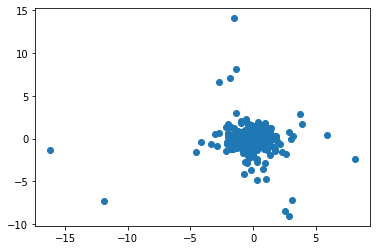

In [ ]:
#plot da recuperação dos sinais

Y1 = y1[0,:].reshape(-1).tolist()
Y2 = y1[1,:].reshape(-1).tolist()


plt.scatter(Y1, Y2)
plt.show()


In [ ]:
y2 = mistura_nao_linear(z2, gx2, b)

  0%|          | 0/1121 [00:00<?, ?it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  0%|          | 1/1121 [00:00<13:26,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  0%|          | 2/1121 [00:01<15:52,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  0%|          | 3/1121 [00:02<15:10,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  0%|          | 4/1121 [00:03<14:41,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  0%|          | 5/1121 [00:03<14:09,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 6/1121 [00:04<14:31,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 7/1121 [00:05<14:16,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 8/1121 [00:06<14:03,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 9/1121 [00:07<14:26,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 10/1121 [00:08<17:08,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 11/1121 [00:09<18:37,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 12/1121 [00:10<19:23,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 13/1121 [00:11<18:24,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|          | 14/1121 [00:12<17:20,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|▏         | 15/1121 [00:13<16:30,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  1%|▏         | 16/1121 [00:13<16:06,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 17/1121 [00:14<16:01,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 18/1121 [00:15<15:56,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 19/1121 [00:16<16:04,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 20/1121 [00:17<17:24,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 21/1121 [00:18<18:38,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 22/1121 [00:19<19:06,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 23/1121 [00:20<17:16,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 24/1121 [00:21<18:20,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 25/1121 [00:23<19:34,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 26/1121 [00:24<19:44,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 27/1121 [00:24<18:23,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  2%|▏         | 28/1121 [00:25<16:33,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 29/1121 [00:26<15:56,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 30/1121 [00:27<15:28,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 31/1121 [00:28<15:38,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 32/1121 [00:28<15:14,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 33/1121 [00:29<15:17,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 34/1121 [00:30<15:27,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 35/1121 [00:31<14:27,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 36/1121 [00:31<13:48,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 37/1121 [00:32<13:47,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 38/1121 [00:33<14:03,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  3%|▎         | 39/1121 [00:34<13:44,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▎         | 40/1121 [00:35<15:11,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▎         | 41/1121 [00:36<16:59,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▎         | 42/1121 [00:37<17:48,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 43/1121 [00:38<17:49,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 44/1121 [00:39<16:29,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 45/1121 [00:40<15:25,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 46/1121 [00:40<14:42,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 47/1121 [00:41<14:56,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 48/1121 [00:42<14:50,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 49/1121 [00:43<14:14,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  4%|▍         | 50/1121 [00:43<13:30,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 51/1121 [00:44<14:00,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 52/1121 [00:45<13:44,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 53/1121 [00:46<13:22,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 54/1121 [00:46<13:10,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 55/1121 [00:47<13:53,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▍         | 56/1121 [00:48<15:01,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▌         | 57/1121 [00:50<17:16,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▌         | 58/1121 [00:51<18:18,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▌         | 59/1121 [00:52<18:20,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▌         | 60/1121 [00:52<16:48,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  5%|▌         | 61/1121 [00:53<15:51,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 62/1121 [00:54<15:24,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 63/1121 [00:55<15:26,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 64/1121 [00:56<15:15,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 65/1121 [00:57<14:43,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 66/1121 [00:57<14:41,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 67/1121 [00:58<15:00,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 68/1121 [00:59<14:22,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 69/1121 [01:00<14:26,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▌         | 70/1121 [01:01<13:35,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▋         | 71/1121 [01:01<13:00,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  6%|▋         | 72/1121 [01:02<14:29,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 73/1121 [01:03<16:04,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 74/1121 [01:05<17:20,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 75/1121 [01:06<18:08,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 76/1121 [01:07<18:47,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 77/1121 [01:08<19:15,  1.11s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 78/1121 [01:09<18:58,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 79/1121 [01:10<18:39,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 80/1121 [01:11<16:42,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 81/1121 [01:12<16:14,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 82/1121 [01:12<15:08,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 83/1121 [01:13<15:03,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  7%|▋         | 84/1121 [01:14<15:11,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 85/1121 [01:15<14:16,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 86/1121 [01:16<13:34,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 87/1121 [01:17<15:39,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 88/1121 [01:18<17:01,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 89/1121 [01:19<17:23,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 90/1121 [01:20<16:53,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 91/1121 [01:21<15:38,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 92/1121 [01:21<14:49,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 93/1121 [01:22<14:26,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 94/1121 [01:23<14:16,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  8%|▊         | 95/1121 [01:24<14:18,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▊         | 96/1121 [01:25<14:02,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▊         | 97/1121 [01:25<13:10,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▊         | 98/1121 [01:26<12:56,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 99/1121 [01:27<13:37,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 100/1121 [01:28<13:24,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 101/1121 [01:28<12:57,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 102/1121 [01:29<13:19,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 103/1121 [01:30<15:06,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 104/1121 [01:32<16:28,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 105/1121 [01:33<17:09,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



  9%|▉         | 106/1121 [01:33<15:37,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 107/1121 [01:34<14:42,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 108/1121 [01:35<14:23,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 109/1121 [01:36<13:29,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 110/1121 [01:36<13:14,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 111/1121 [01:37<13:05,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|▉         | 112/1121 [01:38<13:08,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|█         | 113/1121 [01:39<13:00,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|█         | 114/1121 [01:39<13:02,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|█         | 115/1121 [01:40<13:20,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|█         | 116/1121 [01:41<13:34,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 10%|█         | 117/1121 [01:42<13:45,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 118/1121 [01:43<13:52,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 119/1121 [01:44<15:13,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 120/1121 [01:45<16:23,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 121/1121 [01:46<16:56,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 122/1121 [01:47<16:30,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 123/1121 [01:48<14:45,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 124/1121 [01:48<13:47,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 125/1121 [01:49<13:14,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█         | 126/1121 [01:50<13:14,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█▏        | 127/1121 [01:51<13:25,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 11%|█▏        | 128/1121 [01:52<13:25,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 129/1121 [01:52<13:19,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 130/1121 [01:53<12:58,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 131/1121 [01:54<12:56,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 132/1121 [01:55<12:59,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 133/1121 [01:56<14:44,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 134/1121 [01:57<16:22,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 135/1121 [01:59<18:27,  1.12s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 136/1121 [02:00<19:17,  1.18s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 137/1121 [02:01<19:20,  1.18s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 138/1121 [02:02<17:52,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 139/1121 [02:03<16:42,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 12%|█▏        | 140/1121 [02:04<15:33,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 141/1121 [02:04<14:33,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 142/1121 [02:05<14:35,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 143/1121 [02:06<14:50,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 144/1121 [02:07<14:33,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 145/1121 [02:08<13:53,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 146/1121 [02:09<13:33,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 147/1121 [02:09<13:25,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 148/1121 [02:10<13:36,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 149/1121 [02:11<12:57,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 150/1121 [02:12<12:17,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 13%|█▎        | 151/1121 [02:13<14:03,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▎        | 152/1121 [02:14<15:46,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▎        | 153/1121 [02:15<16:25,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▎        | 154/1121 [02:16<15:50,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 155/1121 [02:17<14:59,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 156/1121 [02:18<14:06,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 157/1121 [02:18<13:10,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 158/1121 [02:19<13:12,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 159/1121 [02:20<13:32,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 160/1121 [02:21<14:11,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 161/1121 [02:22<13:45,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 14%|█▍        | 162/1121 [02:23<13:26,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 163/1121 [02:23<13:06,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 164/1121 [02:24<12:35,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 165/1121 [02:25<12:20,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 166/1121 [02:25<11:58,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 167/1121 [02:27<13:51,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▍        | 168/1121 [02:28<15:08,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▌        | 169/1121 [02:29<15:52,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▌        | 170/1121 [02:30<16:04,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▌        | 171/1121 [02:31<14:14,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▌        | 172/1121 [02:31<14:06,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 15%|█▌        | 173/1121 [02:32<13:14,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 174/1121 [02:33<13:02,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 175/1121 [02:34<12:22,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 176/1121 [02:34<12:21,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 177/1121 [02:35<12:05,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 178/1121 [02:36<12:25,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 179/1121 [02:37<12:16,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 180/1121 [02:37<11:53,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 181/1121 [02:38<12:15,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▌        | 182/1121 [02:39<12:55,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▋        | 183/1121 [02:40<14:02,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 16%|█▋        | 184/1121 [02:41<14:59,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 185/1121 [02:42<15:28,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 186/1121 [02:43<14:56,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 187/1121 [02:44<14:27,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 188/1121 [02:45<15:44,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 189/1121 [02:47<16:36,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 190/1121 [02:48<16:29,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 191/1121 [02:48<15:12,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 192/1121 [02:49<13:59,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 193/1121 [02:50<13:51,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 194/1121 [02:51<13:33,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 195/1121 [02:52<13:01,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 17%|█▋        | 196/1121 [02:52<12:58,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 197/1121 [02:54<14:20,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 198/1121 [02:55<15:28,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 199/1121 [02:56<15:57,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 200/1121 [02:57<15:37,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 201/1121 [02:58<14:03,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 202/1121 [02:58<12:56,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 203/1121 [02:59<12:29,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 204/1121 [03:00<12:12,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 205/1121 [03:00<11:52,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 206/1121 [03:01<12:07,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 18%|█▊        | 207/1121 [03:02<12:04,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▊        | 208/1121 [03:03<11:31,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▊        | 209/1121 [03:03<11:19,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▊        | 210/1121 [03:04<11:17,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 211/1121 [03:05<11:15,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 212/1121 [03:06<11:20,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 213/1121 [03:07<11:35,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 214/1121 [03:08<12:56,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 215/1121 [03:09<14:14,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 216/1121 [03:10<15:07,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 217/1121 [03:11<14:52,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 19%|█▉        | 218/1121 [03:12<13:47,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 219/1121 [03:12<12:53,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 220/1121 [03:13<13:02,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 221/1121 [03:14<12:53,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 222/1121 [03:15<12:31,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 223/1121 [03:15<11:46,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|█▉        | 224/1121 [03:16<11:42,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|██        | 225/1121 [03:17<11:17,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|██        | 226/1121 [03:18<11:49,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|██        | 227/1121 [03:19<11:36,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|██        | 228/1121 [03:19<11:20,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 20%|██        | 229/1121 [03:20<11:40,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 230/1121 [03:21<13:04,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 231/1121 [03:22<14:22,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 232/1121 [03:24<15:19,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 233/1121 [03:25<15:17,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 234/1121 [03:25<14:27,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 235/1121 [03:26<13:13,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 236/1121 [03:27<12:27,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 237/1121 [03:28<11:58,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██        | 238/1121 [03:28<11:34,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██▏       | 239/1121 [03:29<11:12,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██▏       | 240/1121 [03:30<12:01,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 21%|██▏       | 241/1121 [03:31<11:28,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 242/1121 [03:31<10:56,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 243/1121 [03:32<12:17,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 244/1121 [03:34<13:39,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 245/1121 [03:35<14:57,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 246/1121 [03:36<15:41,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 247/1121 [03:37<16:11,  1.11s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 248/1121 [03:38<16:15,  1.12s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 249/1121 [03:39<14:55,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 250/1121 [03:40<13:47,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 251/1121 [03:41<12:48,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 22%|██▏       | 252/1121 [03:42<12:32,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 253/1121 [03:42<11:52,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 254/1121 [03:43<11:38,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 255/1121 [03:44<11:44,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 256/1121 [03:45<11:17,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 257/1121 [03:45<11:13,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 258/1121 [03:46<10:59,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 259/1121 [03:47<11:27,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 260/1121 [03:48<11:44,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 261/1121 [03:49<11:22,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 262/1121 [03:50<12:32,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 23%|██▎       | 263/1121 [03:51<13:58,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▎       | 264/1121 [03:52<14:35,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▎       | 265/1121 [03:53<14:01,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▎       | 266/1121 [03:54<13:16,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 267/1121 [03:54<12:47,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 268/1121 [03:55<12:08,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 269/1121 [03:56<11:48,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 270/1121 [03:57<11:24,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 271/1121 [03:57<11:16,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 272/1121 [03:58<10:54,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 273/1121 [03:59<10:47,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 24%|██▍       | 274/1121 [04:00<10:27,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 275/1121 [04:00<10:44,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 276/1121 [04:01<10:16,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 277/1121 [04:02<10:53,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 278/1121 [04:03<10:51,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 279/1121 [04:04<12:36,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▍       | 280/1121 [04:05<13:46,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▌       | 281/1121 [04:06<14:21,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▌       | 282/1121 [04:07<13:45,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▌       | 283/1121 [04:08<12:52,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▌       | 284/1121 [04:09<11:56,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 25%|██▌       | 285/1121 [04:09<11:21,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 286/1121 [04:10<10:45,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 287/1121 [04:11<10:26,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 288/1121 [04:11<09:59,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 289/1121 [04:12<09:59,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 290/1121 [04:13<10:34,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 291/1121 [04:14<10:30,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 292/1121 [04:14<10:26,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 293/1121 [04:15<10:48,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▌       | 294/1121 [04:16<10:35,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▋       | 295/1121 [04:17<11:08,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▋       | 296/1121 [04:18<12:54,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 26%|██▋       | 297/1121 [04:19<13:41,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 298/1121 [04:20<14:13,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 299/1121 [04:22<14:41,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 300/1121 [04:23<14:50,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 301/1121 [04:24<14:45,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 302/1121 [04:25<13:25,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 303/1121 [04:25<12:28,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 304/1121 [04:26<11:50,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 305/1121 [04:27<11:36,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 306/1121 [04:28<11:29,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 307/1121 [04:28<10:46,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 27%|██▋       | 308/1121 [04:29<10:27,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 309/1121 [04:30<10:46,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 310/1121 [04:31<11:22,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 311/1121 [04:32<12:38,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 312/1121 [04:33<13:27,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 313/1121 [04:34<13:14,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 314/1121 [04:35<12:18,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 315/1121 [04:36<11:28,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 316/1121 [04:36<11:11,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 317/1121 [04:37<10:59,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 318/1121 [04:38<10:52,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 28%|██▊       | 319/1121 [04:39<10:44,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▊       | 320/1121 [04:39<10:13,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▊       | 321/1121 [04:40<10:09,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▊       | 322/1121 [04:41<10:06,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 323/1121 [04:42<09:53,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 324/1121 [04:42<09:43,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 325/1121 [04:43<10:26,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 326/1121 [04:44<10:11,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 327/1121 [04:45<11:43,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 328/1121 [04:46<12:57,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 329/1121 [04:48<13:38,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 29%|██▉       | 330/1121 [04:48<12:36,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 331/1121 [04:49<11:47,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 332/1121 [04:50<11:25,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 333/1121 [04:51<10:44,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 334/1121 [04:51<10:16,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 335/1121 [04:52<10:23,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|██▉       | 336/1121 [04:53<10:43,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|███       | 337/1121 [04:54<10:36,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|███       | 338/1121 [04:54<10:19,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|███       | 339/1121 [04:55<10:21,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|███       | 340/1121 [04:56<10:23,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 30%|███       | 341/1121 [04:57<10:39,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 342/1121 [04:58<11:30,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 343/1121 [04:59<12:33,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 344/1121 [05:00<13:30,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 345/1121 [05:02<13:51,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 346/1121 [05:02<12:43,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 347/1121 [05:03<11:42,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 348/1121 [05:04<11:19,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 349/1121 [05:05<11:02,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███       | 350/1121 [05:06<11:03,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███▏      | 351/1121 [05:06<10:51,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███▏      | 352/1121 [05:07<10:36,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 31%|███▏      | 353/1121 [05:08<10:23,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 354/1121 [05:09<10:02,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 355/1121 [05:10<11:39,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 356/1121 [05:11<12:41,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 357/1121 [05:12<13:37,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 358/1121 [05:14<14:37,  1.15s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 359/1121 [05:15<14:45,  1.16s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 360/1121 [05:16<14:27,  1.14s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 361/1121 [05:17<13:15,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 362/1121 [05:17<12:12,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 363/1121 [05:18<11:22,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 32%|███▏      | 364/1121 [05:19<10:31,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 365/1121 [05:20<10:05,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 366/1121 [05:20<10:11,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 367/1121 [05:21<10:07,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 368/1121 [05:22<10:10,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 369/1121 [05:23<09:45,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 370/1121 [05:24<09:46,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 371/1121 [05:24<09:53,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 372/1121 [05:25<10:12,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 373/1121 [05:26<10:01,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 374/1121 [05:27<11:24,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 33%|███▎      | 375/1121 [05:28<12:10,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▎      | 376/1121 [05:29<12:33,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▎      | 377/1121 [05:30<11:36,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▎      | 378/1121 [05:31<10:51,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 379/1121 [05:32<10:24,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 380/1121 [05:32<09:53,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 381/1121 [05:33<09:50,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 382/1121 [05:34<09:51,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 383/1121 [05:35<09:53,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 384/1121 [05:35<09:30,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 385/1121 [05:36<10:02,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 34%|███▍      | 386/1121 [05:37<10:11,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 387/1121 [05:38<09:48,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 388/1121 [05:39<09:46,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 389/1121 [05:40<10:08,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 390/1121 [05:41<11:03,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 391/1121 [05:42<11:45,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▍      | 392/1121 [05:43<12:12,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▌      | 393/1121 [05:44<11:40,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▌      | 394/1121 [05:45<10:43,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▌      | 395/1121 [05:45<09:55,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▌      | 396/1121 [05:46<10:15,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 35%|███▌      | 397/1121 [05:47<09:59,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 398/1121 [05:48<09:43,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 399/1121 [05:48<09:25,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 400/1121 [05:49<09:21,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 401/1121 [05:50<09:46,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 402/1121 [05:51<09:43,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 403/1121 [05:52<09:21,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 404/1121 [05:52<09:40,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 405/1121 [05:53<09:22,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▌      | 406/1121 [05:54<10:06,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▋      | 407/1121 [05:55<11:20,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▋      | 408/1121 [05:57<12:16,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 36%|███▋      | 409/1121 [05:58<13:46,  1.16s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 410/1121 [05:59<13:41,  1.16s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 411/1121 [06:00<13:31,  1.14s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 412/1121 [06:01<12:13,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 413/1121 [06:02<11:00,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 414/1121 [06:03<10:24,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 415/1121 [06:03<09:51,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 416/1121 [06:04<09:24,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 417/1121 [06:05<09:39,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 418/1121 [06:06<09:47,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 419/1121 [06:07<09:32,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 37%|███▋      | 420/1121 [06:07<09:16,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 421/1121 [06:08<10:21,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 422/1121 [06:10<11:19,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 423/1121 [06:11<12:08,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 424/1121 [06:12<11:58,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 425/1121 [06:13<11:07,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 426/1121 [06:13<10:16,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 427/1121 [06:14<10:26,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 428/1121 [06:15<10:00,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 429/1121 [06:16<09:41,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 430/1121 [06:16<09:03,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 38%|███▊      | 431/1121 [06:17<09:26,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▊      | 432/1121 [06:18<09:40,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▊      | 433/1121 [06:19<09:30,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▊      | 434/1121 [06:20<09:07,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 435/1121 [06:21<09:01,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 436/1121 [06:21<08:50,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 437/1121 [06:22<09:46,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 438/1121 [06:23<10:46,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 439/1121 [06:25<11:44,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 440/1121 [06:26<11:39,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 441/1121 [06:26<10:35,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 39%|███▉      | 442/1121 [06:27<10:04,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 443/1121 [06:28<09:46,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 444/1121 [06:29<09:08,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 445/1121 [06:29<08:46,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 446/1121 [06:30<08:56,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 447/1121 [06:31<09:01,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|███▉      | 448/1121 [06:32<08:59,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 449/1121 [06:33<08:53,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 450/1121 [06:33<08:30,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 451/1121 [06:34<08:32,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 452/1121 [06:35<08:13,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 453/1121 [06:36<08:20,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 40%|████      | 454/1121 [06:37<09:55,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 455/1121 [06:38<10:50,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 456/1121 [06:39<11:15,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 457/1121 [06:40<10:45,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 458/1121 [06:41<09:44,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 459/1121 [06:41<09:16,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 460/1121 [06:42<09:16,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 461/1121 [06:43<09:01,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████      | 462/1121 [06:44<09:21,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████▏     | 463/1121 [06:45<10:28,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████▏     | 464/1121 [06:46<11:04,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 41%|████▏     | 465/1121 [06:47<11:11,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 466/1121 [06:48<10:22,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 467/1121 [06:49<10:07,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 468/1121 [06:50<09:51,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 469/1121 [06:51<10:58,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 470/1121 [06:52<11:30,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 471/1121 [06:53<11:35,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 472/1121 [06:54<11:08,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 473/1121 [06:55<10:40,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 474/1121 [06:56<10:00,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 475/1121 [06:57<09:32,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 42%|████▏     | 476/1121 [06:58<09:20,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 477/1121 [06:58<08:43,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 478/1121 [06:59<08:59,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 479/1121 [07:00<09:09,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 480/1121 [07:01<09:18,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 481/1121 [07:02<08:55,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 482/1121 [07:02<08:37,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 483/1121 [07:03<08:31,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 484/1121 [07:04<09:37,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 485/1121 [07:06<10:29,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 486/1121 [07:07<10:53,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 43%|████▎     | 487/1121 [07:08<10:22,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▎     | 488/1121 [07:08<09:40,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▎     | 489/1121 [07:09<09:06,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▎     | 490/1121 [07:10<08:48,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 491/1121 [07:11<08:33,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 492/1121 [07:11<08:16,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 493/1121 [07:12<08:26,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 494/1121 [07:13<08:20,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 495/1121 [07:14<08:05,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 496/1121 [07:14<08:04,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 497/1121 [07:15<08:10,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 44%|████▍     | 498/1121 [07:16<08:13,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 499/1121 [07:17<07:52,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 500/1121 [07:18<08:38,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 501/1121 [07:19<09:37,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 502/1121 [07:20<10:23,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 503/1121 [07:21<10:11,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▍     | 504/1121 [07:22<09:45,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 505/1121 [07:23<08:58,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 506/1121 [07:23<08:31,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 507/1121 [07:24<08:44,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 508/1121 [07:25<08:40,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 509/1121 [07:26<08:45,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 45%|████▌     | 510/1121 [07:27<08:27,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 511/1121 [07:27<08:00,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 512/1121 [07:28<08:01,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 513/1121 [07:29<08:26,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 514/1121 [07:30<08:18,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 515/1121 [07:31<07:57,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 516/1121 [07:32<09:06,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 517/1121 [07:33<10:19,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▌     | 518/1121 [07:35<11:22,  1.13s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▋     | 519/1121 [07:36<12:22,  1.23s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▋     | 520/1121 [07:37<12:11,  1.22s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 46%|████▋     | 521/1121 [07:38<11:11,  1.12s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 522/1121 [07:39<10:05,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 523/1121 [07:39<09:06,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 524/1121 [07:40<08:40,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 525/1121 [07:41<08:49,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 526/1121 [07:42<08:27,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 527/1121 [07:43<08:20,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 528/1121 [07:44<08:36,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 529/1121 [07:44<08:16,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 530/1121 [07:45<08:05,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 531/1121 [07:46<07:54,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 47%|████▋     | 532/1121 [07:47<07:50,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 533/1121 [07:48<08:18,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 534/1121 [07:49<09:07,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 535/1121 [07:50<09:39,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 536/1121 [07:51<09:52,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 537/1121 [07:52<09:27,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 538/1121 [07:53<08:55,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 539/1121 [07:53<08:20,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 540/1121 [07:54<08:04,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 541/1121 [07:55<07:52,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 542/1121 [07:56<07:39,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 48%|████▊     | 543/1121 [07:57<07:38,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▊     | 544/1121 [07:57<07:31,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▊     | 545/1121 [07:58<07:56,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▊     | 546/1121 [07:59<07:50,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 547/1121 [08:00<07:24,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 548/1121 [08:00<07:16,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 549/1121 [08:02<08:14,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 550/1121 [08:03<09:06,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 551/1121 [08:04<09:34,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 552/1121 [08:05<09:47,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 553/1121 [08:06<08:58,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 49%|████▉     | 554/1121 [08:06<08:29,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 555/1121 [08:07<08:12,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 556/1121 [08:08<08:08,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 557/1121 [08:09<07:55,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 558/1121 [08:10<07:41,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 559/1121 [08:10<07:34,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|████▉     | 560/1121 [08:11<07:33,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 561/1121 [08:12<07:41,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 562/1121 [08:13<08:05,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 563/1121 [08:14<08:06,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 564/1121 [08:15<07:49,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 565/1121 [08:16<08:26,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 50%|█████     | 566/1121 [08:17<09:19,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 567/1121 [08:18<09:39,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 568/1121 [08:19<09:24,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 569/1121 [08:20<09:44,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 570/1121 [08:21<10:00,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 571/1121 [08:23<09:58,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 572/1121 [08:23<09:05,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 573/1121 [08:24<08:40,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████     | 574/1121 [08:25<08:37,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████▏    | 575/1121 [08:26<08:24,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████▏    | 576/1121 [08:27<08:18,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 51%|█████▏    | 577/1121 [08:28<07:43,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 578/1121 [08:28<07:30,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 579/1121 [08:29<08:11,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 580/1121 [08:31<09:04,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 581/1121 [08:32<09:34,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 582/1121 [08:33<09:25,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 583/1121 [08:34<08:38,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 584/1121 [08:34<08:08,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 585/1121 [08:35<07:55,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 586/1121 [08:36<07:49,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 587/1121 [08:37<07:28,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 52%|█████▏    | 588/1121 [08:38<07:17,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 589/1121 [08:38<07:06,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 590/1121 [08:39<07:11,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 591/1121 [08:40<07:15,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 592/1121 [08:41<07:20,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 593/1121 [08:42<07:14,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 594/1121 [08:43<06:59,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 595/1121 [08:44<07:47,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 596/1121 [08:45<08:30,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 597/1121 [08:46<08:46,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 598/1121 [08:47<08:24,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 53%|█████▎    | 599/1121 [08:48<08:00,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▎    | 600/1121 [08:48<07:32,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▎    | 601/1121 [08:49<07:09,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▎    | 602/1121 [08:50<07:13,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 603/1121 [08:51<06:55,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 604/1121 [08:51<06:40,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 605/1121 [08:52<06:50,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 606/1121 [08:53<06:55,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 607/1121 [08:54<06:56,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 608/1121 [08:54<06:34,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 609/1121 [08:55<06:36,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 54%|█████▍    | 610/1121 [08:56<06:40,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 611/1121 [08:57<07:16,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 612/1121 [08:58<08:01,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 613/1121 [08:59<08:24,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 614/1121 [09:00<08:31,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 615/1121 [09:01<07:59,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▍    | 616/1121 [09:02<07:39,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 617/1121 [09:03<07:33,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 618/1121 [09:04<07:14,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 619/1121 [09:05<07:04,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 620/1121 [09:05<06:56,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 621/1121 [09:06<06:45,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 55%|█████▌    | 622/1121 [09:07<07:06,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 623/1121 [09:08<07:59,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 624/1121 [09:09<08:32,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 625/1121 [09:10<08:36,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 626/1121 [09:12<08:51,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 627/1121 [09:13<09:02,  1.10s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 628/1121 [09:14<09:02,  1.10s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 629/1121 [09:15<08:36,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▌    | 630/1121 [09:16<07:44,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▋    | 631/1121 [09:16<07:04,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▋    | 632/1121 [09:17<06:42,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 56%|█████▋    | 633/1121 [09:18<06:50,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 634/1121 [09:19<06:37,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 635/1121 [09:19<06:27,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 636/1121 [09:20<06:27,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 637/1121 [09:21<06:30,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 638/1121 [09:22<06:27,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 639/1121 [09:22<06:11,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 640/1121 [09:23<05:59,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 641/1121 [09:24<06:05,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 642/1121 [09:25<06:57,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 643/1121 [09:26<07:40,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 57%|█████▋    | 644/1121 [09:27<08:08,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 645/1121 [09:28<07:44,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 646/1121 [09:29<07:20,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 647/1121 [09:30<07:07,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 648/1121 [09:31<06:44,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 649/1121 [09:31<06:18,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 650/1121 [09:32<06:25,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 651/1121 [09:33<06:25,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 652/1121 [09:34<06:23,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 653/1121 [09:35<06:15,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 654/1121 [09:35<06:06,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 58%|█████▊    | 655/1121 [09:36<06:04,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▊    | 656/1121 [09:37<06:04,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▊    | 657/1121 [09:38<06:09,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▊    | 658/1121 [09:39<06:50,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 659/1121 [09:40<07:29,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 660/1121 [09:41<07:48,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 661/1121 [09:42<07:23,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 662/1121 [09:43<07:15,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 663/1121 [09:44<07:00,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 664/1121 [09:45<06:42,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 665/1121 [09:45<06:22,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 59%|█████▉    | 666/1121 [09:46<06:25,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 667/1121 [09:47<06:27,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 668/1121 [09:48<06:31,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 669/1121 [09:49<06:21,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 670/1121 [09:50<06:19,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 671/1121 [09:50<06:18,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|█████▉    | 672/1121 [09:51<06:04,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 673/1121 [09:52<06:43,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 674/1121 [09:53<07:27,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 675/1121 [09:55<07:50,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 676/1121 [09:56<07:51,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 677/1121 [09:57<08:05,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 60%|██████    | 678/1121 [09:58<08:20,  1.13s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 679/1121 [09:59<08:10,  1.11s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 680/1121 [10:00<07:27,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 681/1121 [10:01<07:03,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 682/1121 [10:01<06:25,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 683/1121 [10:02<06:05,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 684/1121 [10:03<06:08,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 685/1121 [10:04<06:03,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████    | 686/1121 [10:05<05:44,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████▏   | 687/1121 [10:05<05:36,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████▏   | 688/1121 [10:06<06:26,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 61%|██████▏   | 689/1121 [10:08<07:00,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 690/1121 [10:09<07:21,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 691/1121 [10:10<06:54,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 692/1121 [10:10<06:22,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 693/1121 [10:11<06:15,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 694/1121 [10:12<05:54,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 695/1121 [10:13<05:49,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 696/1121 [10:13<05:37,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 697/1121 [10:14<05:30,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 698/1121 [10:15<05:33,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 699/1121 [10:16<05:34,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 62%|██████▏   | 700/1121 [10:17<05:38,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 701/1121 [10:17<05:32,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 702/1121 [10:18<05:29,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 703/1121 [10:19<05:26,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 704/1121 [10:20<05:55,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 705/1121 [10:21<06:35,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 706/1121 [10:22<07:05,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 707/1121 [10:23<06:56,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 708/1121 [10:24<06:36,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 709/1121 [10:25<06:19,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 710/1121 [10:26<05:58,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 63%|██████▎   | 711/1121 [10:26<05:37,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▎   | 712/1121 [10:27<05:51,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▎   | 713/1121 [10:28<05:41,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▎   | 714/1121 [10:29<05:27,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 715/1121 [10:30<05:15,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 716/1121 [10:30<05:02,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 717/1121 [10:31<05:15,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 718/1121 [10:32<05:23,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 719/1121 [10:33<05:21,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 720/1121 [10:34<06:10,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 721/1121 [10:35<06:34,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 722/1121 [10:36<06:50,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 64%|██████▍   | 723/1121 [10:37<06:43,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▍   | 724/1121 [10:38<06:19,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▍   | 725/1121 [10:39<05:50,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▍   | 726/1121 [10:39<05:23,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▍   | 727/1121 [10:40<05:21,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▍   | 728/1121 [10:41<05:17,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 729/1121 [10:42<05:18,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 730/1121 [10:43<05:12,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 731/1121 [10:43<05:03,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 732/1121 [10:44<05:27,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 733/1121 [10:46<06:06,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 65%|██████▌   | 734/1121 [10:47<06:31,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 735/1121 [10:48<06:51,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 736/1121 [10:49<07:20,  1.14s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 737/1121 [10:50<07:19,  1.14s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 738/1121 [10:51<06:59,  1.10s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 739/1121 [10:52<06:28,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 740/1121 [10:53<06:06,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 741/1121 [10:54<05:45,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▌   | 742/1121 [10:54<05:15,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▋   | 743/1121 [10:55<05:00,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▋   | 744/1121 [10:56<05:07,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 66%|██████▋   | 745/1121 [10:57<05:16,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 746/1121 [10:58<05:15,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 747/1121 [10:58<04:56,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 748/1121 [10:59<05:06,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 749/1121 [11:00<05:01,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 750/1121 [11:01<04:55,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 751/1121 [11:02<05:25,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 752/1121 [11:03<05:58,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 753/1121 [11:04<06:09,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 754/1121 [11:05<05:56,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 755/1121 [11:06<05:49,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 67%|██████▋   | 756/1121 [11:07<05:20,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 757/1121 [11:08<05:16,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 758/1121 [11:08<05:02,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 759/1121 [11:09<05:00,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 760/1121 [11:10<04:58,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 761/1121 [11:11<05:08,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 762/1121 [11:12<05:15,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 763/1121 [11:13<04:58,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 764/1121 [11:13<04:48,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 765/1121 [11:14<04:38,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 766/1121 [11:15<04:42,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 68%|██████▊   | 767/1121 [11:16<05:15,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▊   | 768/1121 [11:17<05:44,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▊   | 769/1121 [11:18<05:59,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▊   | 770/1121 [11:19<05:44,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 771/1121 [11:20<05:28,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 772/1121 [11:21<05:26,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 773/1121 [11:22<05:02,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 774/1121 [11:22<04:53,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 775/1121 [11:23<04:47,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 776/1121 [11:24<04:40,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 777/1121 [11:25<04:57,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 778/1121 [11:26<04:50,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 69%|██████▉   | 779/1121 [11:26<04:29,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|██████▉   | 780/1121 [11:27<04:30,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|██████▉   | 781/1121 [11:28<04:42,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|██████▉   | 782/1121 [11:29<05:04,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|██████▉   | 783/1121 [11:30<05:35,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|██████▉   | 784/1121 [11:32<05:54,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 785/1121 [11:33<06:04,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 786/1121 [11:34<06:06,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 787/1121 [11:35<06:12,  1.12s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 788/1121 [11:36<06:04,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 789/1121 [11:37<05:33,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 70%|███████   | 790/1121 [11:38<05:12,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 791/1121 [11:39<04:58,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 792/1121 [11:39<04:45,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 793/1121 [11:40<04:55,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 794/1121 [11:41<04:42,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 795/1121 [11:42<04:31,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 796/1121 [11:43<04:23,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 797/1121 [11:44<04:53,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████   | 798/1121 [11:45<05:11,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████▏  | 799/1121 [11:46<05:20,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████▏  | 800/1121 [11:47<05:05,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 71%|███████▏  | 801/1121 [11:47<04:44,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 802/1121 [11:48<04:35,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 803/1121 [11:49<04:32,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 804/1121 [11:50<04:25,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 805/1121 [11:51<04:21,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 806/1121 [11:51<04:15,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 807/1121 [11:52<04:17,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 808/1121 [11:53<04:17,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 809/1121 [11:54<04:23,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 810/1121 [11:55<04:24,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 811/1121 [11:56<04:17,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 72%|███████▏  | 812/1121 [11:56<04:11,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 813/1121 [11:58<04:44,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 814/1121 [11:59<05:07,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 815/1121 [12:00<05:19,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 816/1121 [12:01<05:02,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 817/1121 [12:02<04:45,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 818/1121 [12:03<04:39,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 819/1121 [12:03<04:36,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 820/1121 [12:04<04:19,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 821/1121 [12:05<04:16,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 822/1121 [12:06<04:34,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 73%|███████▎  | 823/1121 [12:07<04:45,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▎  | 824/1121 [12:08<04:42,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▎  | 825/1121 [12:09<04:28,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▎  | 826/1121 [12:10<04:14,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 827/1121 [12:10<04:10,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 828/1121 [12:12<04:45,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 829/1121 [12:13<05:04,  1.04s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 830/1121 [12:14<05:11,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 831/1121 [12:15<04:48,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 832/1121 [12:16<04:33,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 833/1121 [12:17<04:32,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 834/1121 [12:17<04:17,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 74%|███████▍  | 835/1121 [12:18<04:05,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▍  | 836/1121 [12:19<03:57,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▍  | 837/1121 [12:20<04:11,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▍  | 838/1121 [12:21<04:33,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▍  | 839/1121 [12:22<04:50,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▍  | 840/1121 [12:23<04:44,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 841/1121 [12:24<04:21,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 842/1121 [12:25<04:39,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 843/1121 [12:26<05:01,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 844/1121 [12:28<05:01,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 845/1121 [12:28<04:42,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 75%|███████▌  | 846/1121 [12:29<04:20,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 847/1121 [12:30<04:06,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 848/1121 [12:31<03:50,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 849/1121 [12:31<03:36,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 850/1121 [12:32<03:30,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 851/1121 [12:33<03:43,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 852/1121 [12:34<03:30,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 853/1121 [12:34<03:24,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▌  | 854/1121 [12:35<03:25,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▋  | 855/1121 [12:36<03:21,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▋  | 856/1121 [12:37<03:16,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 76%|███████▋  | 857/1121 [12:38<03:22,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 858/1121 [12:38<03:19,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 859/1121 [12:39<03:52,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 860/1121 [12:41<04:13,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 861/1121 [12:42<04:21,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 862/1121 [12:42<04:02,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 863/1121 [12:43<03:57,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 864/1121 [12:44<03:43,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 865/1121 [12:45<03:42,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 866/1121 [12:46<03:42,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 867/1121 [12:47<03:28,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 77%|███████▋  | 868/1121 [12:47<03:27,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 869/1121 [12:48<03:31,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 870/1121 [12:49<03:36,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 871/1121 [12:50<03:31,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 872/1121 [12:51<03:29,  1.19it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 873/1121 [12:52<03:25,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 874/1121 [12:53<03:36,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 875/1121 [12:54<03:55,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 876/1121 [12:55<04:11,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 877/1121 [12:56<04:10,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 878/1121 [12:57<03:54,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 78%|███████▊  | 879/1121 [12:58<03:37,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▊  | 880/1121 [12:58<03:25,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▊  | 881/1121 [12:59<03:25,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▊  | 882/1121 [13:00<03:15,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 883/1121 [13:01<03:14,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 884/1121 [13:01<03:06,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 885/1121 [13:02<03:04,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 886/1121 [13:03<03:04,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 887/1121 [13:04<03:12,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 888/1121 [13:05<03:06,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 889/1121 [13:05<03:06,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 890/1121 [13:07<03:25,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 79%|███████▉  | 891/1121 [13:08<03:54,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|███████▉  | 892/1121 [13:09<04:10,  1.09s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|███████▉  | 893/1121 [13:10<04:26,  1.17s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|███████▉  | 894/1121 [13:12<04:33,  1.20s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|███████▉  | 895/1121 [13:13<04:27,  1.18s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|███████▉  | 896/1121 [13:14<04:00,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 897/1121 [13:14<03:38,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 898/1121 [13:15<03:34,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 899/1121 [13:16<03:25,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 900/1121 [13:17<03:22,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 901/1121 [13:18<03:15,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 80%|████████  | 902/1121 [13:19<03:12,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 903/1121 [13:19<03:00,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 904/1121 [13:20<02:57,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 905/1121 [13:21<02:55,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 906/1121 [13:22<02:50,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 907/1121 [13:23<03:09,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 908/1121 [13:24<03:32,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 909/1121 [13:25<03:41,  1.05s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████  | 910/1121 [13:26<03:28,  1.01it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████▏ | 911/1121 [13:27<03:16,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████▏ | 912/1121 [13:28<03:08,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 81%|████████▏ | 913/1121 [13:29<02:57,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 914/1121 [13:29<02:55,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 915/1121 [13:30<02:46,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 916/1121 [13:31<02:40,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 917/1121 [13:32<02:34,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 918/1121 [13:32<02:30,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 919/1121 [13:33<02:29,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 920/1121 [13:34<02:28,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 921/1121 [13:34<02:24,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 922/1121 [13:35<02:25,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 923/1121 [13:36<02:24,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 82%|████████▏ | 924/1121 [13:37<02:50,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 925/1121 [13:38<03:07,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 926/1121 [13:39<03:16,  1.01s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 927/1121 [13:40<03:08,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 928/1121 [13:41<03:01,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 929/1121 [13:42<02:55,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 930/1121 [13:43<02:44,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 931/1121 [13:43<02:38,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 932/1121 [13:44<02:33,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 933/1121 [13:45<02:31,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 934/1121 [13:46<02:28,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 935/1121 [13:47<02:23,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 83%|████████▎ | 936/1121 [13:47<02:20,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▎ | 937/1121 [13:48<02:20,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▎ | 938/1121 [13:49<02:21,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 939/1121 [13:50<02:20,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 940/1121 [13:51<02:35,  1.16it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 941/1121 [13:52<02:49,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 942/1121 [13:53<02:59,  1.00s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 943/1121 [13:54<02:57,  1.00it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 944/1121 [13:55<03:00,  1.02s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 945/1121 [13:56<03:13,  1.10s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 946/1121 [13:57<03:14,  1.11s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 84%|████████▍ | 947/1121 [13:58<02:59,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▍ | 948/1121 [13:59<02:45,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▍ | 949/1121 [14:00<02:30,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▍ | 950/1121 [14:01<02:26,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▍ | 951/1121 [14:01<02:21,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▍ | 952/1121 [14:02<02:15,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 953/1121 [14:03<02:09,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 954/1121 [14:03<02:03,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 955/1121 [14:04<02:17,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 956/1121 [14:06<02:35,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 957/1121 [14:07<02:40,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 85%|████████▌ | 958/1121 [14:07<02:26,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 959/1121 [14:08<02:18,  1.17it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 960/1121 [14:09<02:10,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 961/1121 [14:10<02:05,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 962/1121 [14:10<02:00,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 963/1121 [14:11<01:55,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 964/1121 [14:12<01:56,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 965/1121 [14:12<01:51,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▌ | 966/1121 [14:13<01:52,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▋ | 967/1121 [14:14<01:51,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▋ | 968/1121 [14:15<01:48,  1.41it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 86%|████████▋ | 969/1121 [14:15<01:49,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 970/1121 [14:16<01:47,  1.41it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 971/1121 [14:17<01:46,  1.41it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 972/1121 [14:18<02:06,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 973/1121 [14:19<02:19,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 974/1121 [14:20<02:16,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 975/1121 [14:21<02:10,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 976/1121 [14:21<01:59,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 977/1121 [14:22<01:52,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 978/1121 [14:23<01:53,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 979/1121 [14:24<01:55,  1.23it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 87%|████████▋ | 980/1121 [14:24<01:48,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 981/1121 [14:25<01:44,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 982/1121 [14:26<01:43,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 983/1121 [14:27<01:45,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 984/1121 [14:27<01:41,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 985/1121 [14:28<01:39,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 986/1121 [14:29<01:39,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 987/1121 [14:30<01:37,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 988/1121 [14:31<01:56,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 989/1121 [14:32<02:05,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 990/1121 [14:33<02:04,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 991/1121 [14:34<01:56,  1.12it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 88%|████████▊ | 992/1121 [14:34<01:46,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▊ | 993/1121 [14:35<01:45,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▊ | 994/1121 [14:36<01:44,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 995/1121 [14:37<01:41,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 996/1121 [14:37<01:38,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 997/1121 [14:38<01:35,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 998/1121 [14:39<01:32,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 999/1121 [14:40<01:33,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 1000/1121 [14:40<01:31,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 1001/1121 [14:41<01:28,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 1002/1121 [14:42<01:34,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 89%|████████▉ | 1003/1121 [14:43<01:52,  1.05it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|████████▉ | 1004/1121 [14:45<02:03,  1.06s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|████████▉ | 1005/1121 [14:46<02:09,  1.11s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|████████▉ | 1006/1121 [14:47<02:03,  1.07s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|████████▉ | 1007/1121 [14:48<01:49,  1.04it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|████████▉ | 1008/1121 [14:48<01:38,  1.14it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1009/1121 [14:49<01:32,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1010/1121 [14:50<01:28,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1011/1121 [14:50<01:25,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1012/1121 [14:51<01:20,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1013/1121 [14:52<01:19,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 90%|█████████ | 1014/1121 [14:52<01:17,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1015/1121 [14:53<01:18,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1016/1121 [14:54<01:20,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1017/1121 [14:55<01:17,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1018/1121 [14:55<01:16,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1019/1121 [14:56<01:13,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1020/1121 [14:57<01:20,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1021/1121 [14:58<01:30,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████ | 1022/1121 [14:59<01:35,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████▏| 1023/1121 [15:00<01:26,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████▏| 1024/1121 [15:01<01:19,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 91%|█████████▏| 1025/1121 [15:01<01:15,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1026/1121 [15:02<01:11,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1027/1121 [15:03<01:14,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1028/1121 [15:04<01:11,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1029/1121 [15:04<01:09,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1030/1121 [15:05<01:06,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1031/1121 [15:06<01:04,  1.39it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1032/1121 [15:07<01:03,  1.40it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1033/1121 [15:07<01:04,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1034/1121 [15:08<01:01,  1.41it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1035/1121 [15:09<01:00,  1.43it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 92%|█████████▏| 1036/1121 [15:09<01:00,  1.41it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1037/1121 [15:10<01:07,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1038/1121 [15:12<01:15,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1039/1121 [15:13<01:16,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1040/1121 [15:13<01:10,  1.15it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1041/1121 [15:14<01:05,  1.22it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1042/1121 [15:15<01:01,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1043/1121 [15:15<00:59,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1044/1121 [15:16<00:58,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1045/1121 [15:17<00:59,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1046/1121 [15:18<00:56,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1047/1121 [15:18<00:55,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 93%|█████████▎| 1048/1121 [15:19<00:53,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▎| 1049/1121 [15:20<00:51,  1.40it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▎| 1050/1121 [15:21<00:52,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1051/1121 [15:21<00:51,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1052/1121 [15:22<00:50,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1053/1121 [15:23<00:56,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1054/1121 [15:24<01:02,  1.08it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1055/1121 [15:25<01:04,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1056/1121 [15:26<00:58,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1057/1121 [15:27<00:54,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1058/1121 [15:27<00:50,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 94%|█████████▍| 1059/1121 [15:28<00:49,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▍| 1060/1121 [15:29<00:53,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▍| 1061/1121 [15:31<00:58,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▍| 1062/1121 [15:31<00:57,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▍| 1063/1121 [15:32<00:53,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▍| 1064/1121 [15:33<00:48,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1065/1121 [15:34<00:44,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1066/1121 [15:34<00:42,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1067/1121 [15:35<00:41,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1068/1121 [15:36<00:44,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1069/1121 [15:37<00:49,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 95%|█████████▌| 1070/1121 [15:38<00:50,  1.02it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1071/1121 [15:39<00:44,  1.11it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1072/1121 [15:40<00:40,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1073/1121 [15:40<00:37,  1.27it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1074/1121 [15:41<00:35,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1075/1121 [15:42<00:34,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1076/1121 [15:43<00:33,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1077/1121 [15:43<00:32,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▌| 1078/1121 [15:44<00:32,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▋| 1079/1121 [15:45<00:32,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▋| 1080/1121 [15:46<00:30,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 96%|█████████▋| 1081/1121 [15:46<00:29,  1.35it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1082/1121 [15:47<00:28,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1083/1121 [15:48<00:27,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1084/1121 [15:49<00:29,  1.24it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1085/1121 [15:50<00:32,  1.09it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1086/1121 [15:51<00:33,  1.03it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1087/1121 [15:52<00:30,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1088/1121 [15:53<00:28,  1.18it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1089/1121 [15:53<00:25,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1090/1121 [15:54<00:23,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1091/1121 [15:55<00:23,  1.30it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 97%|█████████▋| 1092/1121 [15:55<00:21,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1093/1121 [15:56<00:20,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1094/1121 [15:57<00:19,  1.38it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1095/1121 [15:57<00:18,  1.40it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1096/1121 [15:58<00:17,  1.45it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1097/1121 [15:59<00:16,  1.42it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1098/1121 [16:00<00:16,  1.44it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1099/1121 [16:00<00:15,  1.43it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1100/1121 [16:01<00:14,  1.45it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1101/1121 [16:02<00:15,  1.25it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1102/1121 [16:03<00:17,  1.10it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1103/1121 [16:04<00:16,  1.07it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 98%|█████████▊| 1104/1121 [16:05<00:15,  1.13it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▊| 1105/1121 [16:06<00:13,  1.20it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▊| 1106/1121 [16:06<00:11,  1.26it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1107/1121 [16:07<00:10,  1.28it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1108/1121 [16:08<00:09,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1109/1121 [16:08<00:08,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1110/1121 [16:09<00:08,  1.37it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1111/1121 [16:10<00:07,  1.34it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1112/1121 [16:11<00:06,  1.32it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1113/1121 [16:12<00:06,  1.29it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1114/1121 [16:12<00:05,  1.31it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



 99%|█████████▉| 1115/1121 [16:13<00:04,  1.36it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|█████████▉| 1116/1121 [16:14<00:03,  1.33it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|█████████▉| 1117/1121 [16:15<00:03,  1.21it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|█████████▉| 1118/1121 [16:16<00:02,  1.06it/s]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|█████████▉| 1119/1121 [16:17<00:02,  1.03s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|█████████▉| 1120/1121 [16:18<00:01,  1.08s/it]


loss_ICA = 6.348157911721195 

loss_Ry =  38.68364454970626 



100%|██████████| 1121/1121 [16:19<00:00,  1.14it/s]


#Testando a função com as classes separadas por cada janela

In [ ]:
b = 4
aux = left_hand
#aux = retira_valores(dataset_list_normalized)

#x1 = dataset_list_normalized[0].T
x1 = aux[0]
#print(x1.shape)
#print(type(x1))

c1 = constantes_iniciais(x1,b,1)
# COMO A PRINCIPIO AS CONSTANTES SAO IGUAIS A 1, GX = CSI NESSE MOMENTO
gx1 = potencias(x1,b)
gx1_2 = normaliza_StandardScaler(gx1)
#print(type(gx1_2))
z1 = soma_potencias(gx1_2,c1)
print(gx1_2.shape)
#print(z1)
print(z1.shape)
#print(type(z1))

#dados de 1 usuario de 1 base de dados de treino de eeg
c2 = constantes_iniciais(x1,b,1)
gx2 = potencias(x1,b)
z2 = soma_potencias(gx2,c2)
print(gx2.shape)
print(z2.shape)


(22, 4, 1125)
(22, 1125)
(22, 4, 1125)
(22, 1125)
